In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
%matplotlib inline

from glob import glob

In [3]:
female = glob('./crop/female_crop/*.png')
male = glob('./crop/male_crop/*.png')

In [4]:
male

['./crop/male_crop/male_4590.png',
 './crop/male_crop/male_2687.png',
 './crop/male_crop/male_39.png',
 './crop/male_crop/male_2863.png',
 './crop/male_crop/male_5895.png',
 './crop/male_crop/male_2122.png',
 './crop/male_crop/male_6436.png',
 './crop/male_crop/male_2650.png',
 './crop/male_crop/male_2888.png',
 './crop/male_crop/male_4221.png',
 './crop/male_crop/male_3228.png',
 './crop/male_crop/male_5881.png',
 './crop/male_crop/male_6350.png',
 './crop/male_crop/male_4209.png',
 './crop/male_crop/male_3572.png',
 './crop/male_crop/male_1365.png',
 './crop/male_crop/male_834.png',
 './crop/male_crop/male_3943.png',
 './crop/male_crop/male_4792.png',
 './crop/male_crop/male_6191.png',
 './crop/male_crop/male_6807.png',
 './crop/male_crop/male_4976.png',
 './crop/male_crop/male_6813.png',
 './crop/male_crop/male_6620.png',
 './crop/male_crop/male_4037.png',
 './crop/male_crop/male_3980.png',
 './crop/male_crop/male_4989.png',
 './crop/male_crop/male_2320.png',
 './crop/male_crop/male

In [5]:
path = female + male

In [6]:
path

['./crop/female_crop/female_3502.png',
 './crop/female_crop/female_1315.png',
 './crop/female_crop/female_1473.png',
 './crop/female_crop/female_5615.png',
 './crop/female_crop/female_3264.png',
 './crop/female_crop/female_1467.png',
 './crop/female_crop/female_1301.png',
 './crop/female_crop/female_4279.png',
 './crop/female_crop/female_5167.png',
 './crop/female_crop/female_1329.png',
 './crop/female_crop/female_4251.png',
 './crop/female_crop/female_2620.png',
 './crop/female_crop/female_5629.png',
 './crop/female_crop/female_158.png',
 './crop/female_crop/female_6320.png',
 './crop/female_crop/female_6334.png',
 './crop/female_crop/female_2152.png',
 './crop/female_crop/female_4245.png',
 './crop/female_crop/female_2634.png',
 './crop/female_crop/female_6452.png',
 './crop/female_crop/female_4292.png',
 './crop/female_crop/female_6485.png',
 './crop/female_crop/female_825.png',
 './crop/female_crop/female_5832.png',
 './crop/female_crop/female_5826.png',
 './crop/female_crop/female

In [7]:
path[::-1] #reverse order

['./crop/male_crop/male_5697.png',
 './crop/male_crop/male_391.png',
 './crop/male_crop/male_4589.png',
 './crop/male_crop/male_34.png',
 './crop/male_crop/male_3580.png',
 './crop/male_crop/male_1383.png',
 './crop/male_crop/male_5867.png',
 './crop/male_crop/male_3225.png',
 './crop/male_crop/male_5132.png',
 './crop/male_crop/male_2885.png',
 './crop/male_crop/male_3543.png',
 './crop/male_crop/male_1354.png',
 './crop/male_crop/male_1340.png',
 './crop/male_crop/male_346.png',
 './crop/male_crop/male_3231.png',
 './crop/male_crop/male_1426.png',
 './crop/male_crop/male_6349.png',
 './crop/male_crop/male_3219.png',
 './crop/male_crop/male_2107.png',
 './crop/male_crop/male_6361.png',
 './crop/male_crop/male_1368.png',
 './crop/male_crop/male_2661.png',
 './crop/male_crop/male_4204.png',
 './crop/male_crop/male_5495.png',
 './crop/male_crop/male_4947.png',
 './crop/male_crop/male_2488.png',
 './crop/male_crop/male_3796.png',
 './crop/male_crop/male_1817.png',
 './crop/male_crop/male_

In [8]:
# function to get the size of the image
def getSize(path):
    img = Image.open(path)
    return img.size[0]

In [9]:
getSize(path[0])

182

In [10]:
#Create dataframe 
df = pd.DataFrame(data=path, columns=['path'])
df.head() #display top 5 rows

,path
0,./crop/female_crop/female_3502.png
1,./crop/female_crop/female_1315.png
2,./crop/female_crop/female_1473.png
3,./crop/female_crop/female_5615.png
4,./crop/female_crop/female_3264.png


In [11]:
df.shape

(6059, 1)

In [12]:
df['size'] = df['path'].apply(getSize)
df.head()

,path,size
0,./crop/female_crop/female_3502.png,182
1,./crop/female_crop/female_1315.png,122
2,./crop/female_crop/female_1473.png,54
3,./crop/female_crop/female_5615.png,182
4,./crop/female_crop/female_3264.png,273


In [13]:
df.tail()

,path,size
6054,./crop/male_crop/male_3580.png,182
6055,./crop/male_crop/male_34.png,182
6056,./crop/male_crop/male_4589.png,54
6057,./crop/male_crop/male_391.png,273
6058,./crop/male_crop/male_5697.png,410


# Exploratory Data Analysis  

In [14]:
df.describe()

,size
count,6059.000000
mean,154.000660
std,71.320063
min,24.000000
25%,81.000000
50%,122.000000
75%,182.000000
max,410.000000


<AxesSubplot:>

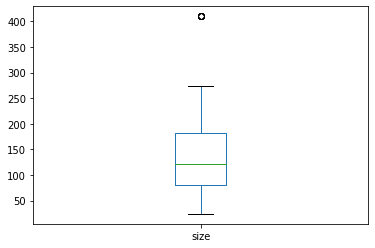

In [15]:
df['size'].plot(kind ='box')

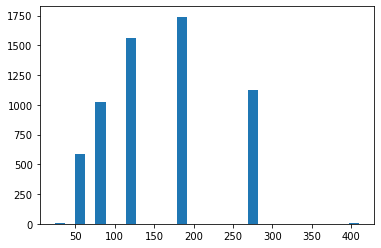

In [16]:
plt.hist(df['size'], bins=30)
plt.show()

# So, based on my analysis 
# 1. I am planning to remove all the images with size less than 60.
# 2. Resize all remaining images to 100 x 100

In [17]:
df_new = df[df['size'] > 60]
df_new

,path,size
0,./crop/female_crop/female_3502.png,182
1,./crop/female_crop/female_1315.png,122
3,./crop/female_crop/female_5615.png,182
4,./crop/female_crop/female_3264.png,273
5,./crop/female_crop/female_1467.png,122
...,...,...
6053,./crop/male_crop/male_1383.png,81
6054,./crop/male_crop/male_3580.png,182
6055,./crop/male_crop/male_34.png,182
6057,./crop/male_crop/male_391.png,273


In [18]:
string = df_new['path'][0]
def gender(string):
    try:
        return string.split('_')[0].split('/')[-1]
    except:
        return None

In [19]:
df['gender'] = df['path'].apply(gender)

In [20]:
df['gender'].value_counts()

female    3591
male      2468
Name: gender, dtype: int64

female    0.592672
male      0.407328
Name: gender, dtype: float64


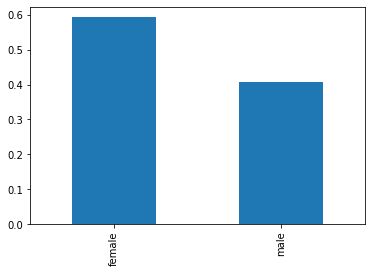

In [21]:
print(df['gender'].value_counts(normalize=True))
df['gender'].value_counts(normalize=True).plot(kind='bar')
plt.show()

1. 60% Female
2. 40% male

# resizing all the images in df_new to 100*100 array

In [75]:
def resize_img(path_to_resize):
    try:
        #step:1 read image
        img = cv2.imread(path_to_resize)
        #step:2 convert into grayscale
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        #step:3 resize into 100 x 100 array
       # print('original image:',gray.shape )
        size = gray.shape[0]
        if size >= 100:
            gray_re = cv2.resize(gray,(100,100),cv2.INTER_AREA) #Shrink
        else:
            gray_re = cv2.resize(gray,(100,100),cv2.INTER_CUBIC) #Enlarge
        #step:4 flatten image(1 x 10,000)
       # print('resized image:', gray_re.shape )
        return gray_re.flatten()
    except:
        return None

In [76]:
resized = resize_img(path[0])
print('resized image:', resized.shape )

resized image: (10000,)


In [77]:
df_new

,path,size,gender,structure_data
0,./crop/female_crop/female_3502.png,182,female,"[126, 126, 126, 116, 116, 116, 104, 104, 104, ..."
1,./crop/female_crop/female_1315.png,122,female,"[221, 221, 221, 221, 221, 221, 221, 221, 221, ..."
3,./crop/female_crop/female_5615.png,182,female,"[67, 17, 57, 67, 17, 57, 69, 19, 59, 73, 23, 6..."
4,./crop/female_crop/female_3264.png,273,female,"[35, 50, 66, 42, 57, 73, 54, 68, 84, 41, 57, 7..."
5,./crop/female_crop/female_1467.png,122,female,"[6, 10, 39, 7, 12, 38, 9, 13, 40, 9, 12, 43, 7..."
...,...,...,...,...
6053,./crop/male_crop/male_1383.png,81,male,"[70, 132, 80, 76, 136, 87, 81, 138, 95, 83, 13..."
6054,./crop/male_crop/male_3580.png,182,male,"[142, 163, 191, 124, 149, 184, 109, 134, 175, ..."
6055,./crop/male_crop/male_34.png,182,male,"[216, 216, 216, 216, 216, 216, 216, 216, 216, ..."
6057,./crop/male_crop/male_391.png,273,male,"[95, 117, 112, 136, 152, 144, 150, 158, 147, 1..."


In [78]:
df_new['gender'] = df_new['path'].apply(gender)
df_new.head()

<ipython-input-78-38f68fd0a050>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['gender'] = df_new['path'].apply(gender)


,path,size,gender,structure_data
0,./crop/female_crop/female_3502.png,182,female,"[126, 126, 126, 116, 116, 116, 104, 104, 104, ..."
1,./crop/female_crop/female_1315.png,122,female,"[221, 221, 221, 221, 221, 221, 221, 221, 221, ..."
3,./crop/female_crop/female_5615.png,182,female,"[67, 17, 57, 67, 17, 57, 69, 19, 59, 73, 23, 6..."
4,./crop/female_crop/female_3264.png,273,female,"[35, 50, 66, 42, 57, 73, 54, 68, 84, 41, 57, 7..."
5,./crop/female_crop/female_1467.png,122,female,"[6, 10, 39, 7, 12, 38, 9, 13, 40, 9, 12, 43, 7..."


In [79]:
#structuring fuction
df_new['structure_data'] = df_new['path'].apply(resize_img)

<ipython-input-79-fd4b1e2314ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['structure_data'] = df_new['path'].apply(resize_img)


In [80]:
df_new

,path,size,gender,structure_data
0,./crop/female_crop/female_3502.png,182,female,"[126, 116, 104, 97, 98, 95, 85, 79, 81, 81, 70..."
1,./crop/female_crop/female_1315.png,122,female,"[221, 221, 221, 221, 221, 222, 224, 225, 223, ..."
3,./crop/female_crop/female_5615.png,182,female,"[35, 35, 37, 41, 41, 40, 44, 43, 27, 14, 14, 1..."
4,./crop/female_crop/female_3264.png,273,female,"[53, 60, 71, 59, 38, 38, 52, 63, 55, 61, 55, 3..."
5,./crop/female_crop/female_1467.png,122,female,"[18, 19, 21, 21, 19, 17, 18, 25, 34, 48, 53, 5..."
...,...,...,...,...
6053,./crop/male_crop/male_1383.png,81,male,"[109, 115, 119, 120, 116, 107, 98, 88, 81, 77,..."
6054,./crop/male_crop/male_3580.png,182,male,"[169, 157, 143, 138, 142, 145, 147, 139, 131, ..."
6055,./crop/male_crop/male_34.png,182,male,"[216, 216, 216, 215, 216, 217, 216, 216, 218, ..."
6057,./crop/male_crop/male_391.png,273,male,"[113, 148, 154, 156, 151, 116, 104, 103, 106, ..."


In [81]:
#copy and expand their columns
df1 = df_new['structure_data'].apply(pd.Series)

In [82]:
df1

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,126,116,104,97,98,95,85,79,81,81,...,142,143,147,151,156,152,157,162,165,167
1,221,221,221,221,221,222,224,225,223,220,...,160,37,27,31,14,59,159,106,51,150
3,35,35,37,41,41,40,44,43,27,14,...,34,34,34,34,34,34,34,34,34,33
4,53,60,71,59,38,38,52,63,55,61,...,84,84,84,84,84,84,84,84,84,85
5,18,19,21,21,19,17,18,25,34,48,...,71,73,73,72,80,86,84,89,93,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6053,109,115,119,120,116,107,98,88,81,77,...,17,24,58,115,167,175,173,175,175,163
6054,169,157,143,138,142,145,147,139,131,141,...,9,10,14,7,5,14,9,3,3,3
6055,216,216,216,215,216,217,216,216,218,219,...,63,60,57,55,53,51,58,68,73,71
6057,113,148,154,156,151,116,104,103,106,101,...,77,65,68,175,253,253,241,249,239,208


In [83]:
df2 = pd.concat((df_new['gender'],df1),axis=1)

In [84]:
df2.head()

,gender,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,female,126,116,104,97,98,95,85,79,81,...,142,143,147,151,156,152,157,162,165,167
1,female,221,221,221,221,221,222,224,225,223,...,160,37,27,31,14,59,159,106,51,150
3,female,35,35,37,41,41,40,44,43,27,...,34,34,34,34,34,34,34,34,34,33
4,female,53,60,71,59,38,38,52,63,55,...,84,84,84,84,84,84,84,84,84,85
5,female,18,19,21,21,19,17,18,25,34,...,71,73,73,72,80,86,84,89,93,99


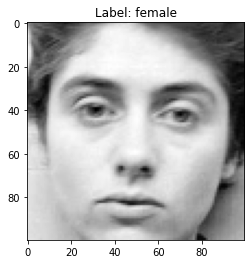

In [86]:
plt.imshow(df2.loc[0][1:].values.reshape(100,100).astype('int'),cmap='gray')
plt.title("Label: "+df2.loc[0]['gender'])
plt.show()

In [87]:
import pickle

In [88]:
pickle.dump(df2,open('./dataframe_images_100_100.pickle','wb'))